In [2]:
# Basic Analysis and Visualization
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



In [3]:
df = pd.read_csv('titanic_train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df['Cabin'] = df['Cabin'].str.get(0)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [10]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [15]:
df.groupby('Pclass')['Fare'].agg(func= 'mean')

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [17]:
df['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [19]:
df['CabinClass'] = pd.cut(df['Fare'], bins = [-np.inf, 10, 15, 20, 25, 30, 35, 40, np.inf], labels = ['T','G','F','E','D','C','B','A'])

In [20]:
df['CabinClass'].head()

0    T
1    A
2    T
3    A
4    T
Name: CabinClass, dtype: category
Categories (8, object): ['T' < 'G' < 'F' < 'E' < 'D' < 'C' < 'B' < 'A']

In [21]:
house_hold_df = pd.read_csv("Family_Income_and_Expenditure.csv")

In [32]:
def draw_bs_reps(data, func, n, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    
    def bootstrap_replicate_1d(data, func):
        """Generate bootstrap replicate of 1D data."""
        bs_sample = np.random.choice(data, len(data))
        return func(bs_sample)

            # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates


   

In [35]:
import seaborn as sns
income = house_hold_df['Total Household Income']
mean_samples = draw_bs_reps(income, np.mean, 5, 10)
mean_samples

array([249480.4671192 , 245221.66211727, 249268.47005584, 248184.72840843,
       247391.71808203, 248116.48160986, 247680.69858463, 245519.11315713,
       247628.61014828, 246510.68536973])

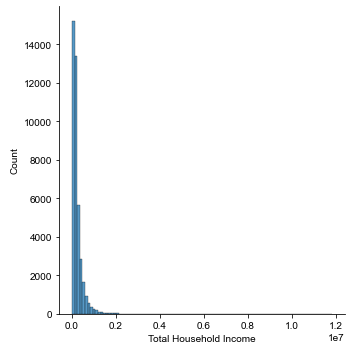

<Figure size 864x576 with 0 Axes>

In [36]:
sns.displot(income, bins = 100)
sns.set_style('darkgrid')
plt.figure(figsize= (12,8))
plt.show()

In [ ]:
ax = sns.histplot(Income, kde = True, bins = 10)
ax.axvline(sample_1, color='black', linestyle='solid', lw=1, label = 'sample')
ax.axvline(pop_1, color='red', linestyle='dashed', lw=1, label= 'population')
plt.legend()
plt.show()